## Decision Tree
$ \displaystyle Gini = 1-(prob\ yes)^2 -(prob\ no)^2$

$\displaystyle entropy = \sum -p_{i}.log2(p_{i})$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
dt = pd.DataFrame({
    "sarjana": [0,0,0,1,1,1],
    "diterima": [0,0,1,0,1,0]
})
dt

,sarjana,diterima
0,0,0
1,0,0
2,0,1
3,1,0
4,1,1
5,1,0


In [3]:
giniS1True = 1 - (1/3)**2 - (2/3)**2
giniS1False = 1 - (1/3)**2 - (2/3)**2
giniS1True, giniS1False

(0.4444444444444444, 0.4444444444444444)

In [4]:
giniS1 = giniS1True*(3/6) + giniS1False*(3/6)
giniS1

0.4444444444444444

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtree = DecisionTreeClassifier().fit(dt[['sarjana']], dt['diterima'])
dtree.predict([[1]])

array([0], dtype=int64)

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]')]

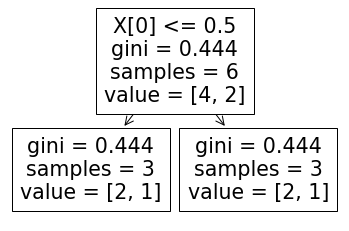

In [6]:
tree.plot_tree(dtree)

In [7]:
tree.export_graphviz(dtree, out_file = 'decision.dot', feature_names=['sarjana'],
                    class_names=['Diterima', 'Ditolak'])

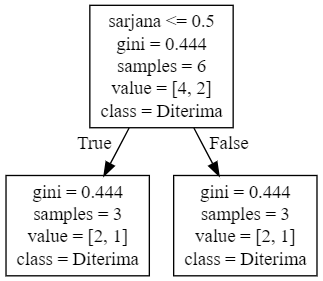

In [8]:
from IPython.display import Image
Image(filename='graphviz_dt.png')

## Decision Tree Entropy
$\displaystyle Entropy = \sum -p_{i}.log2(p_{i})$

$\displaystyle Gain = Entropy(s) - \sum \frac {|S_v|}{|S|} Entropy\ S_v $

In [9]:
dt

,sarjana,diterima
0,0,0
1,0,0
2,0,1
3,1,0
4,1,1
5,1,0


In [13]:
# Hitung Entropy output `diterima`
EnAccTrue =  -1 * (2/6) * np.log2(2/6)
EnAccFalse = -1 * (4/6) * np.log2(4/6)
TotalEnAcc = EnAccTrue + EnAccFalse

# Hitung Entropy sarjana True
EnS1TrueAccTrue = -1 * (1/3) * np.log2(1/3)
EnS1TrueAccFalse = -1 * (2/3) * np.log2(2/3)
TotalEnS1True = EnS1TrueAccTrue + EnS1TrueAccFalse
TotalEnS1True

# Hitung Entropy sarjana False
EnS1FalseAccTrue = -1 * (1/3) * np.log2(1/3)
EnS1TFalseAccFalse = -1 * (2/3) * np.log2(2/3)
TotalEnS1False = EnS1FalseAccTrue + EnS1TFalseAccFalse

# Lakukan weighted average antara S1 True dan S1 False
TotalEnS1 = (3/6)*TotalEnS1True + (3/6)*TotalEnS1False
TotalEnS1

# Cari Gain
gain = TotalEnAcc - TotalEnS1
gain

0.0

In [15]:
from sklearn import tree
dten = tree.DecisionTreeClassifier(criterion='entropy')
dten.fit(dt[['sarjana']], dt['diterima'])
dten.predict([[1]])

array([0], dtype=int64)

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]')]

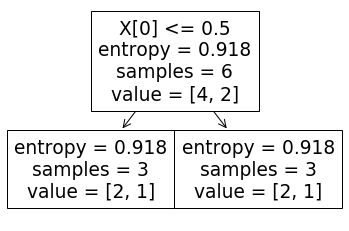

In [16]:
tree.plot_tree(dten.fit(dt[['sarjana']], dt['diterima']))

## Try another dataset

In [19]:
df_sarjana = pd.DataFrame(
    {"sarjana": [0,1,0,0,1], "sehat": [1,0,1,0,0], "supel": [1,0,1,1,1], "diterima":[1,1,0,0,0]})
df_sarjana

,sarjana,sehat,supel,diterima
0,0,1,1,1
1,1,0,0,1
2,0,1,1,0
3,0,0,1,0
4,1,0,1,0


## Gini

In [20]:
gini = DecisionTreeClassifier(criterion='gini')
gini.fit(df_sarjana[['sarjana', 'sehat', 'supel']], df_sarjana['diterima'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(133.92000000000002, 181.2, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'), Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(200.88000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'), Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'), Text(267.84000000000003, 36.23999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]


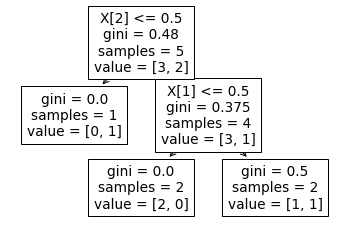

In [21]:
print(tree.plot_tree(gini.fit(df_sarjana[['sarjana', 'sehat', 'supel']], df_sarjana['diterima'])))

## Check Feature Importance for Gini

In [23]:
gini_importances = pd.DataFrame({'features':df_sarjana.columns[:3], 'importance': gini.feature_importances_})
sorted_importances = gini_importances.sort_values('importance', ascending=False)
sorted_importances

,features,importance
2,supel,0.642857
1,sehat,0.357143
0,sarjana,0.000000


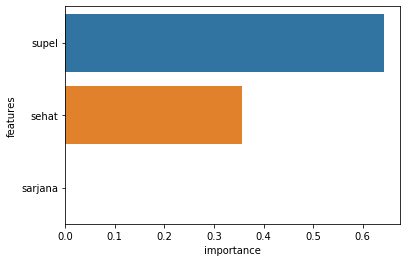

In [25]:
#horizontal barplot
sns.barplot(x='importance', y='features', data=sorted_importances)

## Entropy

In [26]:
entropy = DecisionTreeClassifier(criterion='entropy')
entropy.fit(df_sarjana[['sarjana', 'sehat', 'supel']], df_sarjana['diterima'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(133.92000000000002, 181.2, 'X[2] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]')]

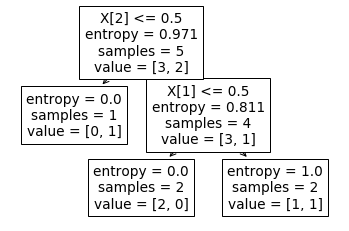

In [27]:
tree.plot_tree(entropy.fit(df_sarjana[['sarjana', 'sehat', 'supel']], df_sarjana['diterima']))

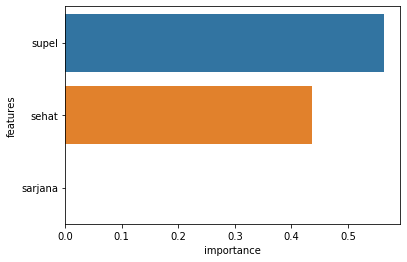

In [28]:
entropy_importances = pd.DataFrame({'features': df_sarjana.columns[:3], 'importance': entropy.feature_importances_})
sorted_entropy = entropy_importances.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='features', data=sorted_entropy)

## Kyphosis

In [29]:
kypho = pd.read_csv('kyphosis.csv')
kypho.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [30]:
kypho['Kyphosis'] = kypho['Kyphosis'].apply(lambda x: 0 if x == 'absent' else 1)

In [31]:
kypho

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


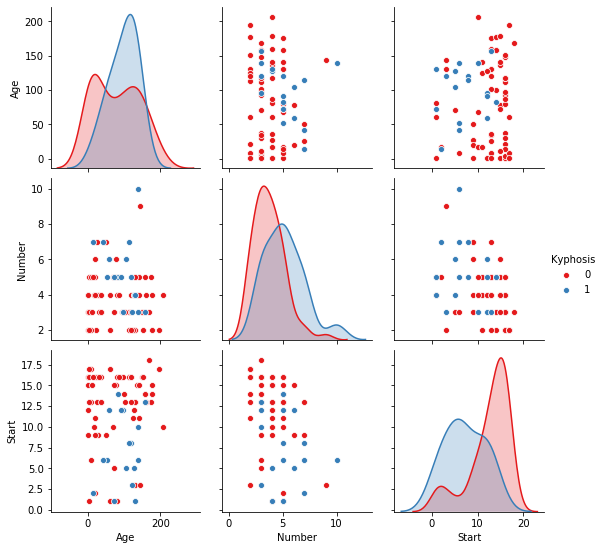

In [32]:
sns.pairplot(kypho, hue='Kyphosis', palette='Set1')

In [45]:
from sklearn.model_selection import train_test_split
X = kypho.drop('Kyphosis', axis=1)
y = kypho['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [47]:
y_train.value_counts()

0    47
1     9
Name: Kyphosis, dtype: int64

In [49]:
dt_entro = DecisionTreeClassifier(criterion='entropy')
dt_entro.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation

In [51]:
entro_pred = dt_entro.predict(X_test)
entro_prob = dt_entro.predict_proba(X_test)

In [52]:
entro_prob

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [53]:
gini_pred = dt_gini.predict(X_test)
gini_prob = dt_gini.predict_proba(X_test)

In [54]:
gini_prob

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc

In [56]:
print(classification_report(y_test,entro_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.83      0.62      0.71         8

    accuracy                           0.84        25
   macro avg       0.84      0.78      0.80        25
weighted avg       0.84      0.84      0.83        25



In [57]:
print(confusion_matrix(y_test, entro_pred))

[[16  1]
 [ 3  5]]


In [58]:
print(classification_report(y_test,gini_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [60]:
print(confusion_matrix(y_test, gini_pred))

[[12  5]
 [ 6  2]]


## Tree Viz Entropy

In [61]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

export_graphviz(dt_entro, out_file='entro_kypho.dot',
               filled=True, rounded=True, feature_names = X.columns, special_characters=True)

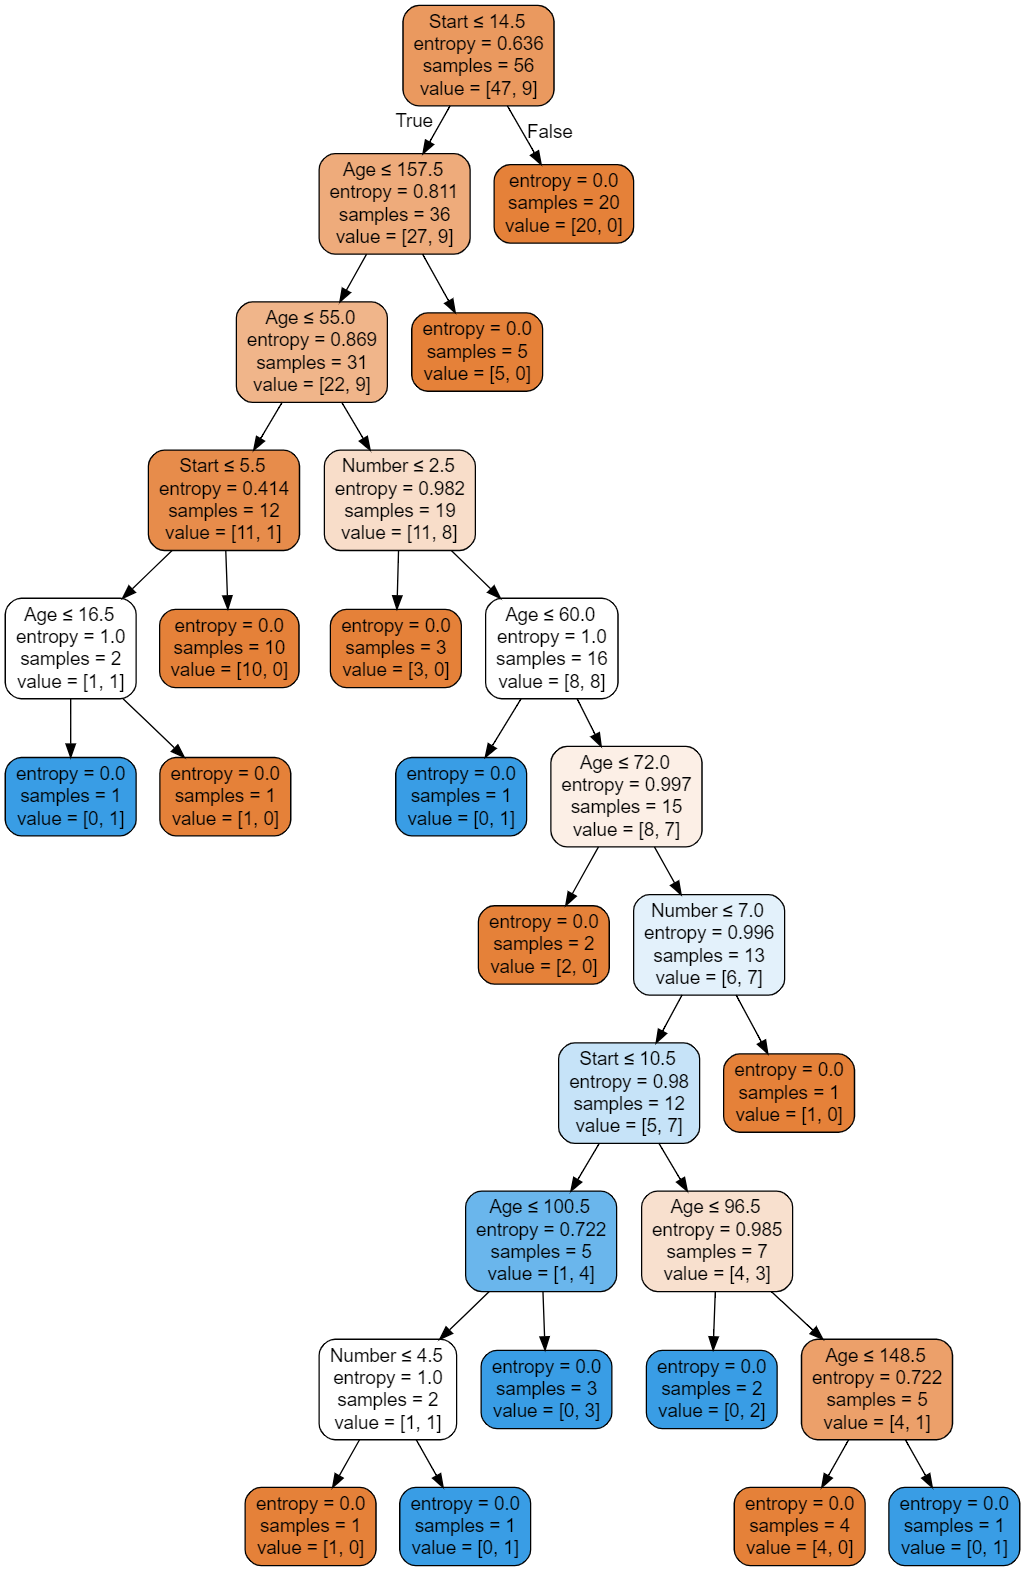

In [62]:
Image(filename='graphviz_entro_kypho.png')

## Tree Viz Gini

In [64]:
export_graphviz(dt_gini, out_file='gini_kypho.dot', filled=True, rounded=True, feature_names= X.columns,
              special_characters=True)

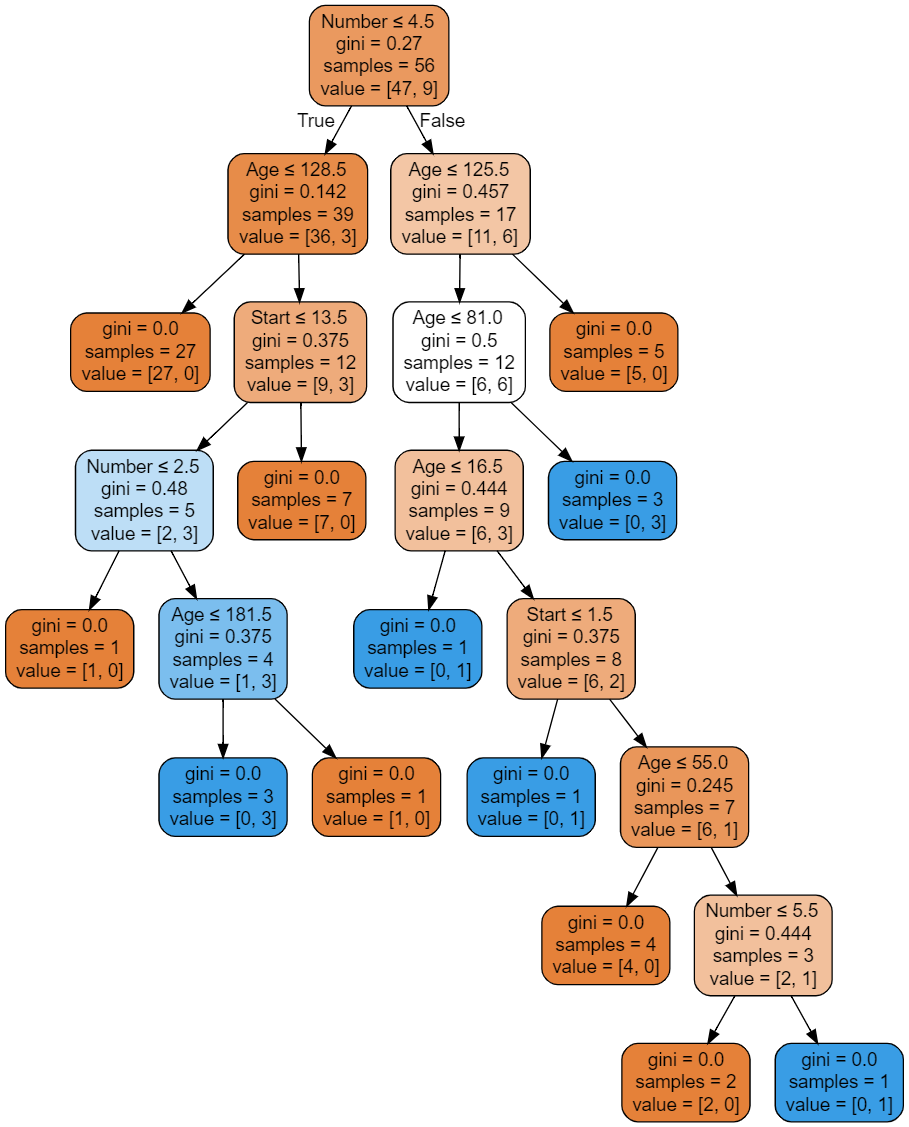

In [65]:
Image(filename='graphviz_gini_kypho.png')

## Decision Tree Regressor
https://www.youtube.com/watch?v=g9c66TUylZ4

Kasus regresi aja

In [66]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
data = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
target = pd.Series(boston['target'])

In [67]:
target.mean()

22.532806324110698

In [68]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [69]:
dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(data, target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [70]:
export_graphviz(dt_reg, out_file='tree_reg.dot', filled=True, rounded=True, feature_names = data.columns,
               special_characters=True)

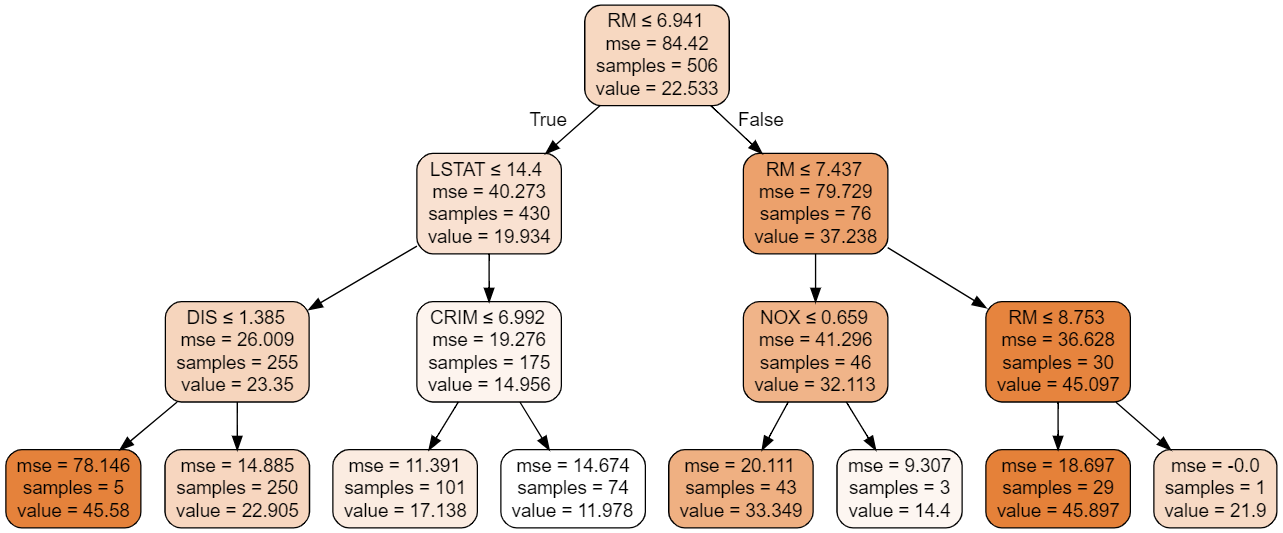

In [71]:
Image(filename='graphviz_reg.png')

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
pred = dt_reg.predict(data)
rmse = np.sqrt(mean_squared_error(target, pred))
r2 = r2_score(target,pred)
rmse, r2

(3.9219738648194213, 0.8177924678036443)

## Random Forest

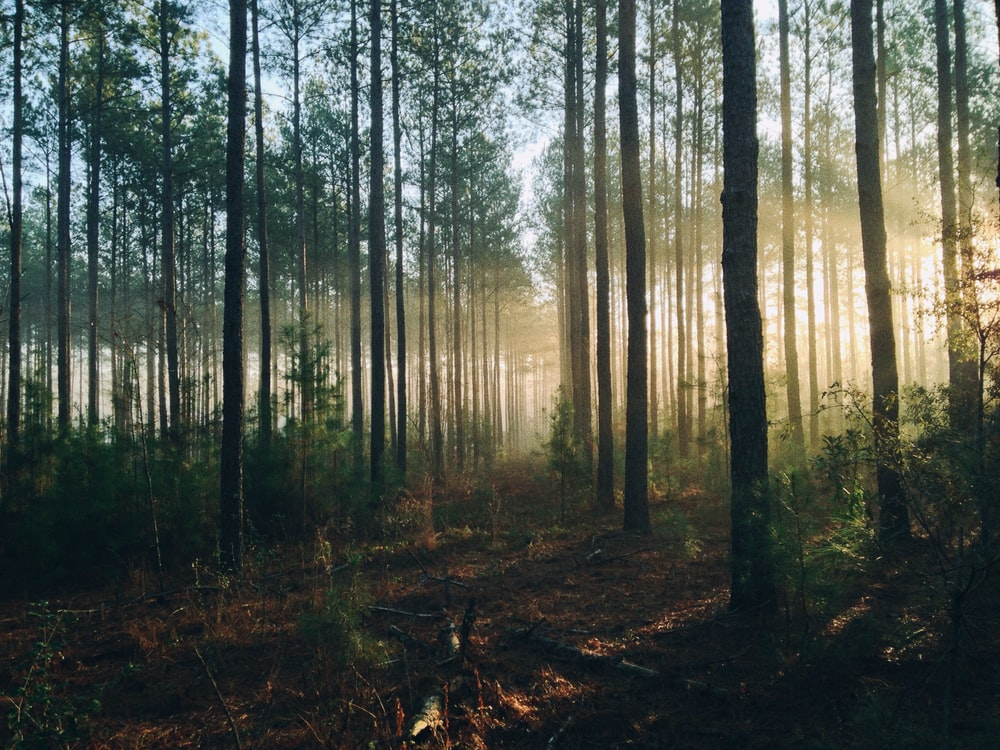

In [74]:
Image(filename='forest.jpg')

Random Forest, as its name stated is analyze by random sub-sample from the dataset (by bootstrap sample or not) to create a lot of decision tree and creating an ensemble method. 

There are 2 level of randomness in the Random Forest; Row level and Column level. In each decision tree, the sub-sample is n number of row (if bootstrap then the same row could be selected again). After that at each node, the columns is randomly selected as many as sqrt(number of columns).

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, criterion='gini', max_features='auto', oob_score=True, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
len(rfc.estimators_)

100

In [78]:
rfc.classes_

array([0, 1], dtype=int64)

In [79]:
rfc.n_features_

3

In [80]:
rfc.oob_score_

0.8214285714285714

In [81]:
rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)

In [82]:
rfc_proba

array([[1.  , 0.  ],
       [0.45, 0.55],
       [0.41, 0.59],
       [0.86, 0.14],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.72, 0.28],
       [0.85, 0.15],
       [0.85, 0.15],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.72, 0.28],
       [0.69, 0.31],
       [0.58, 0.42],
       [0.92, 0.08],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.76, 0.24],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.56, 0.44],
       [0.54, 0.46],
       [0.62, 0.38],
       [0.82, 0.18]])

In [84]:
len(y_test)

25

In [85]:
y_test.value_counts()

0    17
1     8
Name: Kyphosis, dtype: int64

In [83]:
print(confusion_matrix(y_test, rfc_pred))

[[17  0]
 [ 6  2]]


In [86]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



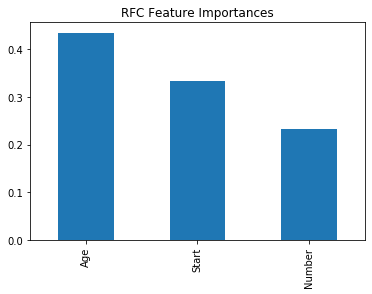

In [87]:
coef_rfc = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending = False)
coef_rfc.plot(kind='bar', title='RFC Feature Importances')

In [88]:
# Menghitung ROC AUC dari Decision Tree: Entropy
probentro1 = entro_prob[:,1]
fpr_en1, tpr_en1, threshold_en1 = roc_curve(y_test, probentro1)
roc_auc_en1 = auc(fpr_en1, tpr_en1)

# Menghitung ROC AUC dari Decision Tree: Gini
probgini1 = gini_prob[:,1]
fpr_gi1, tpr_gi1, threshold_gi1 = roc_curve(y_test, probgini1)
roc_auc_gi1 = auc(fpr_gi1, tpr_gi1)

# Menghitung ROC AUC dari Random Forest: Gini
probrfc1 = rfc_proba[:,1]
fpr_rf1, tpr_rf1, threshold_rf1 = roc_curve(y_test, probrfc1)
roc_auc_rf1 = auc(fpr_rf1, tpr_rf1)

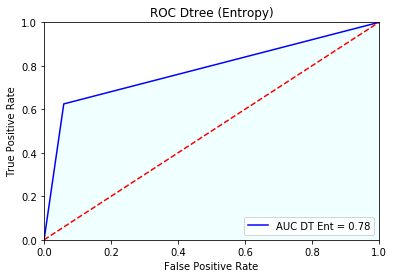

In [89]:
plt.title('ROC Dtree (Entropy)')
plt.plot(fpr_en1, tpr_en1, 'blue', label='AUC DT Ent = {}'.format(round(roc_auc_en1,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_en1, tpr_en1, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

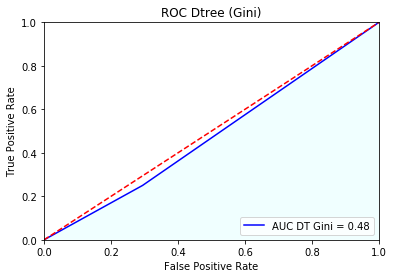

In [90]:
plt.title('ROC Dtree (Gini)')
plt.plot(fpr_gi1, tpr_gi1, 'blue', label='AUC DT Gini = {}'.format(round(roc_auc_gi1,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gi1, tpr_gi1, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

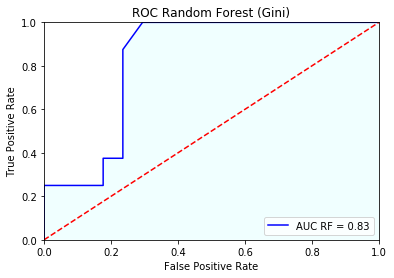

In [92]:
plt.title('ROC Random Forest (Gini)')
plt.plot(fpr_rf1, tpr_rf1, 'blue', label='AUC RF = {}'.format(round(roc_auc_rf1,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rf1, tpr_rf1, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

In [93]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=1.0, k_neighbors=5)
Xsmot_train, ysmot_train = sm.fit_sample(X_train, y_train)

In [94]:
Xsmot_train

,Age,Number,Start
0,11,3,15
1,140,4,15
2,158,3,14
3,127,4,12
4,139,3,10
...,...,...,...
89,101,4,8
90,35,6,6
91,136,3,9
92,61,5,9


In [98]:
ysmot_train.value_counts()

1    47
0    47
Name: Kyphosis, dtype: int64

In [99]:
y_train.value_counts()

0    47
1     9
Name: Kyphosis, dtype: int64

In [100]:
rfcsmot = RandomForestClassifier(bootstrap=True, criterion='gini', max_features='auto', oob_score=True, random_state=42)
rfcsmot.fit(Xsmot_train, ysmot_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [101]:
rfcsmot_pred = rfcsmot.predict(X_test)
rfcsmot_prob = rfcsmot.predict_proba(X_test)

In [102]:
print(confusion_matrix(y_test, rfcsmot_pred))

[[16  1]
 [ 1  7]]
